# Machine Learning for Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classiﬁcation task NO=0 and AB=1.

(a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [103]:
# Akshay Bhatia
# 4983495776
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math as  m

In [104]:
# edit file path to get data
dataset=np.genfromtxt("https://raw.githubusercontent.com/akshaybhatia95/vertebral_column_dataset/master/column_2C.dat",dtype=None,delimiter=' ')
# !git clone https://github.com/akshaybhatia95/vertebral_column_dataset.git
dataset


C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


array([( 63.03, 22.55,  39.61,  40.48,  98.67, -2.5000e-01, b'AB'),
       ( 39.06, 10.06,  25.02,  29.  , 114.41,  4.5600e+00, b'AB'),
       ( 68.83, 22.22,  50.09,  46.61, 105.99, -3.5300e+00, b'AB'),
       ( 69.3 , 24.65,  44.31,  44.64, 101.87,  1.1210e+01, b'AB'),
       ( 49.71,  9.65,  28.32,  40.06, 108.17,  7.9200e+00, b'AB'),
       ( 40.25, 13.92,  25.12,  26.33, 130.33,  2.2300e+00, b'AB'),
       ( 53.43, 15.86,  37.17,  37.57, 120.57,  5.9900e+00, b'AB'),
       ( 45.37, 10.76,  29.04,  34.61, 117.27, -1.0680e+01, b'AB'),
       ( 43.79, 13.53,  42.69,  30.26, 125.  ,  1.3290e+01, b'AB'),
       ( 36.69,  5.01,  41.95,  31.68,  84.24,  6.6000e-01, b'AB'),
       ( 49.71, 13.04,  31.33,  36.67, 108.65, -7.8300e+00, b'AB'),
       ( 31.23, 17.72,  15.5 ,  13.52, 120.06,  5.0000e-01, b'AB'),
       ( 48.92, 19.96,  40.26,  28.95, 119.32,  8.0300e+00, b'AB'),
       ( 53.57, 20.46,  33.1 ,  33.11, 110.97,  7.0400e+00, b'AB'),
       ( 57.3 , 24.19,  47.  ,  33.11, 116.81,  

(b) Pre-Processing and Exploratory data analysis:

(b)(III)Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as thetraining set and the rest of the data as the test set.

In [105]:

xtrain=np.zeros(shape=(310,6))
for i in range(0,310):
    for j in range(0,6):
        xtrain[i][j]=dataset[i][j]
xtrain_orig=xtrain
xtrain1=xtrain[0:140,:]
xtest1=xtrain[140:210,:]
xtrain2=xtrain[210:281,:]
xtest2=xtrain[281:310,:]
xtrain=np.concatenate((xtrain1,xtrain2))
xtest=np.concatenate((xtest1,xtest2))
print(xtrain.shape)
ytrain=np.zeros(shape=(310,1))
abnormal=dataset[0][6]
normal=dataset[309][6]
for i in range(0,310):
    for j in range(1):
        if(dataset[i][j+6]== abnormal):
            ytrain[i][j]=1
        else:
            ytrain[i][j]=0
ytrain1=ytrain[0:140,:]
ytest1=ytrain[140:210,:]
ytrain2=ytrain[210:281,:]
ytest2=ytrain[281:310,:]
ytrain=np.concatenate((ytrain1,ytrain2))
ytest=np.concatenate((ytest1,ytest2))    
ytest=np.ravel(ytest)


(211, 6)


i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

C:\Users\D\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


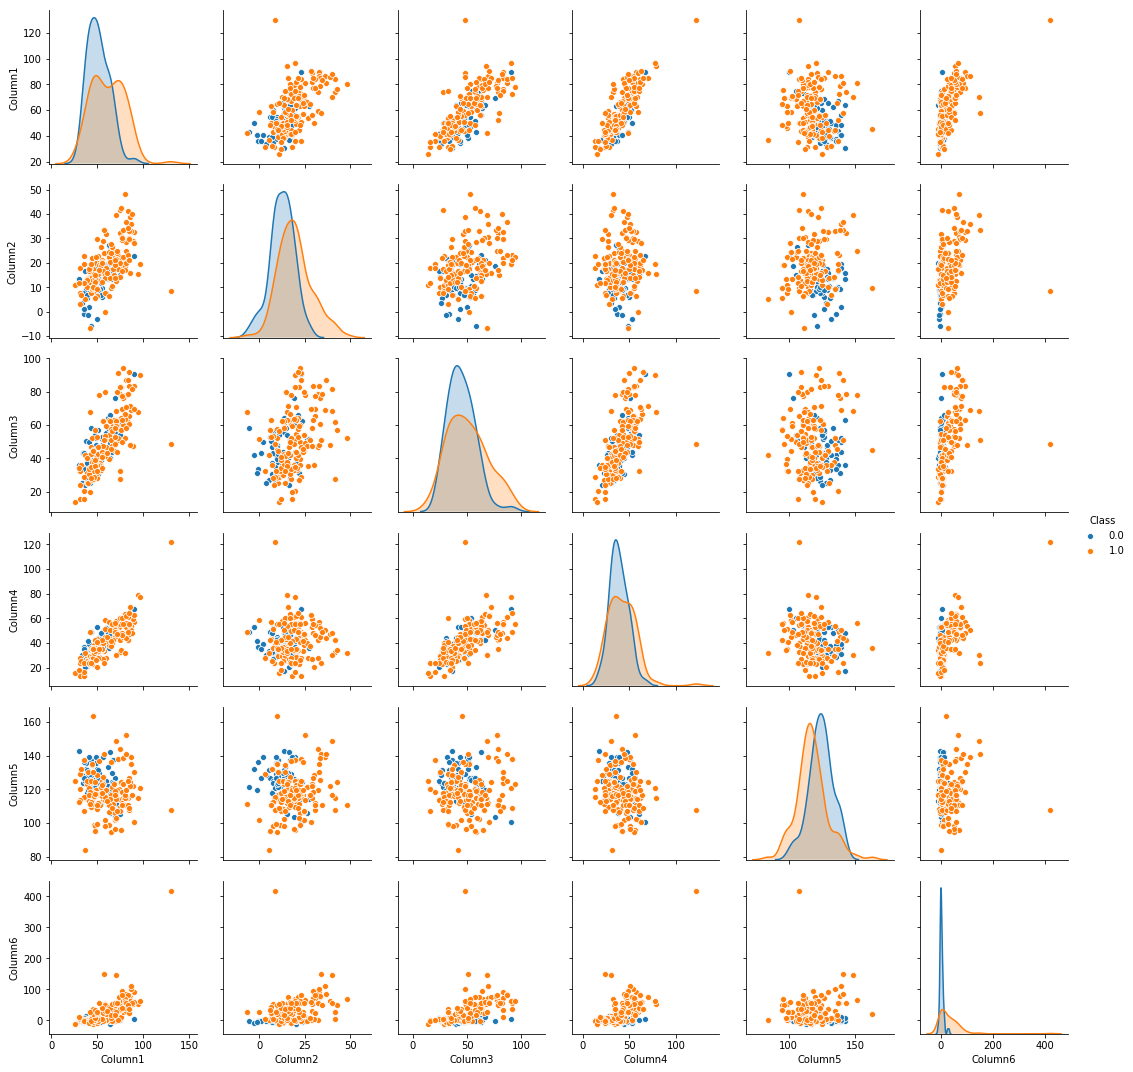

In [106]:

dataset=(pd.DataFrame({'Column1':xtrain[:,0],'Column2':xtrain[:,1],'Column3':xtrain[:,2],'Column4':xtrain[:,3],'Column5':xtrain[:,4],'Column6':xtrain[:,5],'Class':ytrain[:,0]}))
colnames=['Column1','Column2','Column3','Column4','Column5','Column6']
sns.pairplot(dataset,vars=colnames,hue="Class",kind='scatter')

ii. Make boxplots for each of the independent variables. Use color to showClasses 0 and 1 (see ISLR p. 129)

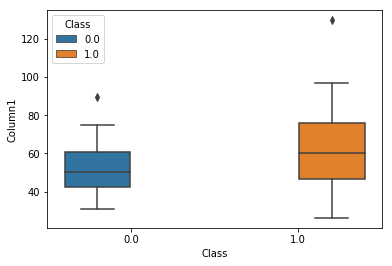

In [107]:
sns.boxplot(data=dataset,y="Column1",x="Class",hue="Class")

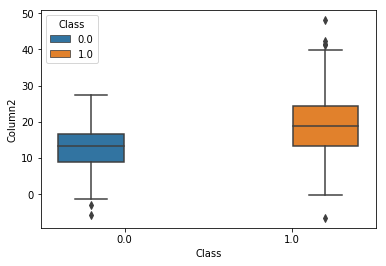

In [108]:
sns.boxplot(data=dataset,y="Column2",x="Class",hue="Class")


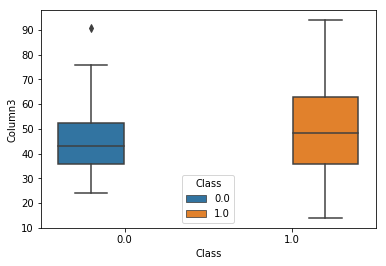

In [109]:
sns.boxplot(data=dataset,y="Column3",x="Class",hue="Class")


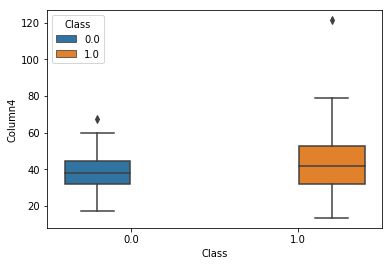

In [110]:
sns.boxplot(data=dataset,y="Column4",x="Class",hue="Class")


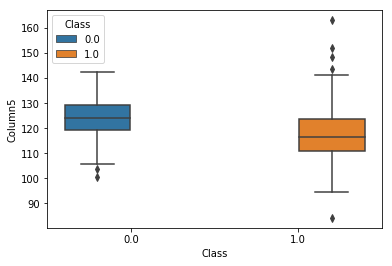

In [111]:
sns.boxplot(data=dataset,y="Column5",x="Class",hue="Class")


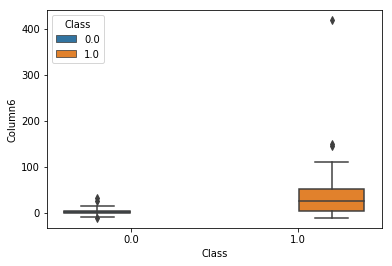

In [112]:
sns.boxplot(data=dataset,y="Column6",x="Class",hue="Class")


c)Classification using KNN on Vertebral Column Data Set 

i. Write code for k-nearest neighbors with Euclidean metric (or use a softwarepackage).

In [113]:
error_train=[]
error_test = []
best_score=0
best_k=0
# Calculating error for K values between 1 and 40
for i in range(xtrain.shape[0],1,-1):  
    clf = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    clf.fit(xtrain, ytrain.ravel())
    pred_train=clf.predict(xtrain)
    score=clf.score(xtrain,ytrain.ravel())
    error_train.insert(0,(1-score)*210)

for i in range(xtest.shape[0],1,-1):  
    clf = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    clf.fit(xtrain, ytrain.ravel())
    pred_test =clf.predict(xtest)
    score=clf.score(xtest,ytest)
    error_test.insert(0,(1-score)*100)
    if score>best_score:
        best_score=score
        best_k=i
print(best_k)
print(best_score)

4
0.9595959595959596


ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k.

Text(0, 0.5, 'Error')

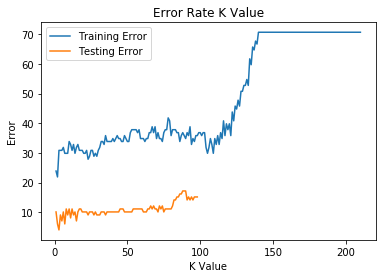

In [114]:
plt.plot(np.arange(1,211), error_train,label='Training Error')
plt.plot(np.arange(1,xtest.shape[0]), error_test,label='Testing Error')
plt.legend()
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Error')

In [115]:
# FOR K=4 , we are getting the best score,although for bigger values
# the error is reducing but that may lead to overfitting.
clf=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
clf.fit(xtrain,ytrain.ravel()) 
score=clf.score(xtest,ytest)
ypred=clf.predict(xtest)

from sklearn.metrics import classification_report, confusion_matrix  
cm=confusion_matrix(ytest, ypred)
print(cm)  
print(classification_report(ytest, ypred))
print("True negative rate:",cm[1][1]/(cm[1][0]+cm[1][1]))
print("True positive rate:",cm[0][0]/(cm[0][0]+cm[0][1]))

[[26  3]
 [ 1 69]]
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        29
         1.0       0.96      0.99      0.97        70

   micro avg       0.96      0.96      0.96        99
   macro avg       0.96      0.94      0.95        99
weighted avg       0.96      0.96      0.96        99

True negative rate: 0.9857142857142858
True positive rate: 0.896551724137931


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, 2 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 3 Note: for each N, select your training set by choosing the ﬁrst bN/3c rows of Class 0 and the ﬁrst N − bN/3c rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

In [116]:
optimalKs=[]
error_train_curr=[]
varying_train_size=[]
neighbors = np.arange(0,21)
for n in range(10,211,10):
    varying_train_size.append(n)
    max_score=0
    bestK=-1
    minError=1000
    xtrain_curr1=xtrain[140:140+(int)(n/3),:]
    xtrain_curr2=xtrain[0:((n-(int)(n/3))),:]
    xtrain_curr=np.concatenate((xtrain_curr2,xtrain_curr1))
    
    ytrain_curr1=ytrain[140:140+(int)(n/3),:]
    ytrain_curr2=ytrain[0:((n-(int)(n/3))),:]
    ytrain_curr=np.concatenate((ytrain_curr2,ytrain_curr1))
    
    for i in range(1,n,5):
         if(i<xtrain_curr.shape[0]):

            clf = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
            clf.fit(xtrain_curr, ytrain_curr.ravel())
            curr_score=clf.score(xtest,ytest)            

            if(curr_score>max_score):
                max_score=curr_score
                bestK=i
                minError=1-max_score

    optimalKs.append(bestK)
    error_train_curr.append(1-max_score)

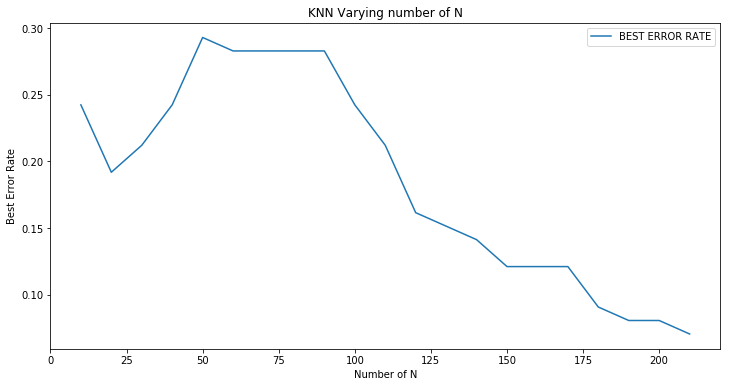

In [117]:
plt.figure(figsize=(12, 6))  
plt.plot(neighbors*10+10, error_train_curr,label="BEST ERROR RATE")
plt.legend()
plt.title('KNN Varying number of N')
plt.xlabel('Number of N')
plt.ylabel('Best Error Rate')
plt.show()

Let us further explore some variants of KNN.
(d) Replace the Euclidean metric with the following metrics 4 and test them. Summarize the test errors (i.e., when k = k ∗ ) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.


i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

In [118]:
best_score1=0
bestK1=0
for i in range(1,197,1):
    clf=KNeighborsClassifier(n_neighbors=i,p=1)
    clf.fit(xtrain,ytrain.ravel())
    ypred=clf.predict(xtest)
    score=clf.score(xtest,ytest)
    if score > best_score1:
        best_score1 = score
        bestK1=i
print(best_score1)
print(bestK1)

0.9191919191919192
4


B. with log 10 (p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k ∗ you found for the Manhattan distance in 1(d)iA. What is the best log 10 (p)?

In [119]:
best_score2=0
bestj=0
j=0.1
while j<=1:
    clf=KNeighborsClassifier(n_neighbors=bestK1,p=pow(10,j))
    clf.fit(xtrain,ytrain.ravel())
    ypred=clf.predict(xtest)
    score=clf.score(xtest,ytest)
    if score > best_score2:
        best_score2 = score
        bestj=j
    j=j+0.1
print(best_score2)
print(bestj)

0.9595959595959596
0.2


C. which becomes Chebyshev Distance with p → ∞

In [120]:
best_scoreCheby=0
bestKCheby=0
for i in range(1,197,5):
    clf=KNeighborsClassifier(n_neighbors=i,metric='chebyshev',p=float('inf'))
    clf.fit(xtrain,ytrain.ravel())
    ypred=clf.predict(xtest)
    score=clf.score(xtest,ytest)
    if score > best_scoreCheby:
        best_scoreCheby = score
        bestKCheby=i
print(best_scoreCheby)
print(bestKCheby)

0.9393939393939394
16


ii. Mahalanobis Distance.

In [121]:
bestScoreM=0
bestKm=0
S=np.cov(xtrain.T)
S1=np.linalg.pinv(S)
for i in range(1,197,5):
    clf = KNeighborsClassifier(n_neighbors= i, metric = 'mahalanobis',metric_params={'V': S1})
    clf.fit(xtrain,ytrain.ravel())
    ypred=clf.predict(xtest)
    score=clf.score(xtest,ytest)
    if score > bestScoreM:
        bestScoreM = score
        bestKm=i
print(bestScoreM)
print(bestKm)

0.9292929292929293
6


In [122]:
my_data = {'Distance':['Manhattan','Chebyshev','Mahalanobis'],'BestK':[bestK1,bestKCheby,bestKm],'TestErrors':[(1-best_score1)*100,(1-best_scoreCheby)*100,(1-bestScoreM)*100]}
result = pd.DataFrame(my_data)
result

,Distance,BestK,TestErrors
0,Manhattan,4,8.080808
1,Chebyshev,16,6.060606
2,Mahalanobis,6,7.070707


(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater inﬂuence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.¶

In [123]:
best_scoreE=0
bestKE=0
for i in range(1,197,1):
    clf=KNeighborsClassifier(n_neighbors=i,p=2)
    clf.fit(xtrain,ytrain.ravel())
    ypred=clf.predict(xtest)
    score=clf.score(xtest,ytest)
    if score > best_scoreE:
        best_scoreE = score
        bestKE=i
print(best_scoreE)
print(bestKE)

0.9595959595959596
4


In [124]:
best_score1=0
bestK1=0
for i in range(1,197,1):
    clf=KNeighborsClassifier(n_neighbors=i,p=1)
    clf.fit(xtrain,ytrain.ravel())
    ypred=clf.predict(xtest)
    score=clf.score(xtest,ytest)
    if score > best_score1:
        best_score1 = score
        bestK1=i
print(best_score1)
print(bestK1)

0.9191919191919192
4


In [125]:
best_scoreCheby=0
bestKCheby=0
for i in range(1,197,5):
    clf=KNeighborsClassifier(n_neighbors=i,metric='chebyshev',p=float('inf'))
    clf.fit(xtrain,ytrain.ravel())
    ypred=clf.predict(xtest)
    score=clf.score(xtest,ytest)
    if score > best_scoreCheby:
        best_scoreCheby = score
        bestKCheby=i
print(best_scoreCheby)
print(bestKCheby)

0.9393939393939394
16


In [126]:
data = {'DistanceName':['Euclidean','Manhattan','Chebyshev'],'BestK':[bestKE,bestK1,bestKCheby],'TestErrors':[(1-best_scoreE)*100,(1-best_score1)*100,(1-best_scoreCheby)*100]}
resulttable = pd.DataFrame(data)
resulttable

,DistanceName,BestK,TestErrors
0,Euclidean,4,4.040404
1,Manhattan,4,8.080808
2,Chebyshev,16,6.060606


f) What is the lowest training error rate you achieved in this homework?

The lowest training error rate achieved in this homework is 0.00